In [1]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames
using CairoMakie

In [2]:
using Revise
using Newtrinos
using Newtrinos.osc

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (2), wrong dep version loaded (2))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0xd3f3e59442dce285, 0xf4ce92cc4863f228, 0x7d74401463fb02e3, 0x767579a60b99e23b, 0xf4d90d86a5375ee2, 0x24de1b9ad2804ccd, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())


In [3]:

#STANDARD MODEL

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)

physics_SM = (; osc);

experiments_SM = (

   katrin= Newtrinos.katrin.configure(physics_SM),
);

p = Newtrinos.get_params(experiments_SM)

[ Info: Loading Katrin data


(m₀ = 0.1, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [4]:

all_priors = Newtrinos.get_priors(experiments_SM)


vars_to_scan = (m₀=31, Δm²₃₁=31)  

modified_priors = (
    #N = par.N,
    m₀ =all_priors.m₀,
    #r = all_priors.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = p.δCP,
    θ₁₂ = p.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ =p.θ₂₃
)
    


(m₀ = Uniform{Float64}(a=0.001, b=2.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [5]:
likelihood = Newtrinos.generate_likelihood(experiments_SM);

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


NewtrinosResult((m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], δCP = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], θ₁₂ = [0.587252368744322

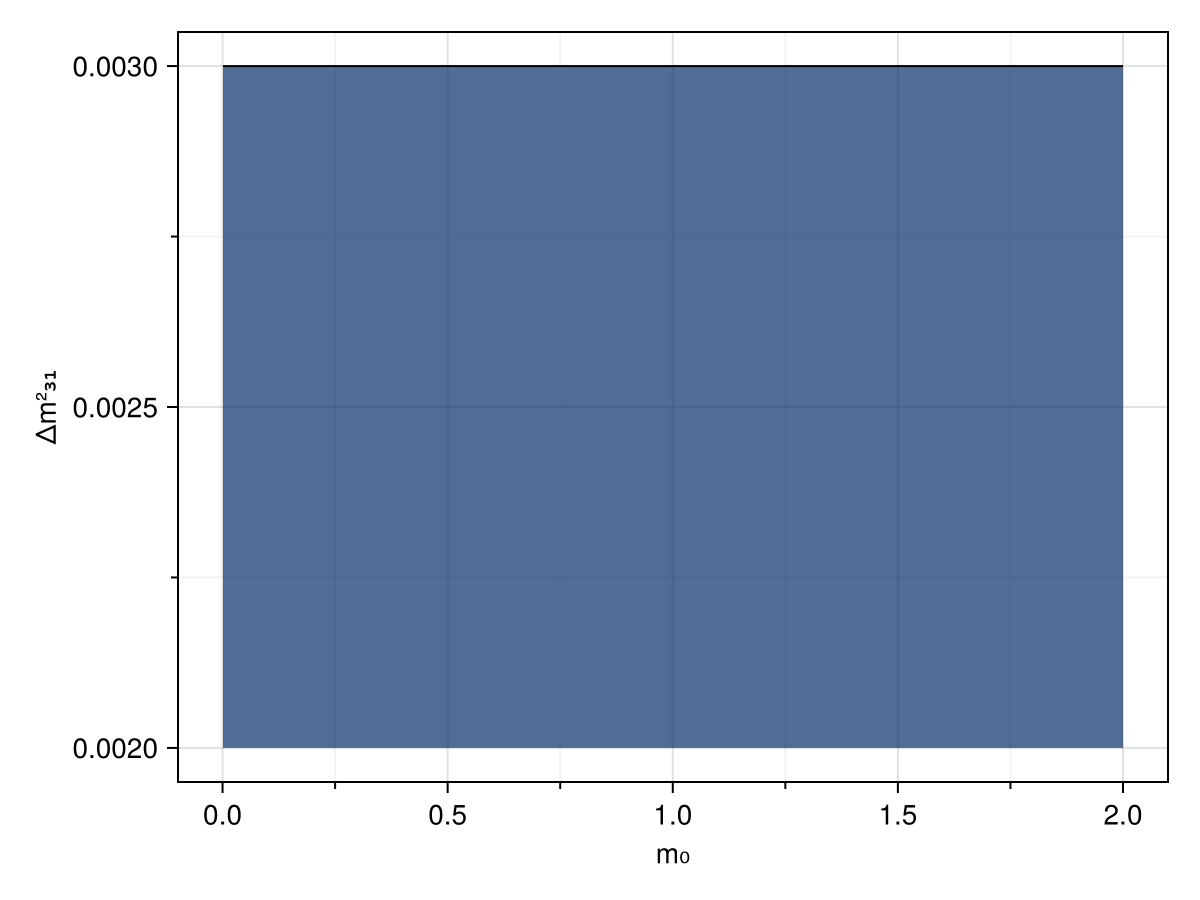

In [6]:
#plot and save the image
img = CairoMakie.plot(result)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_SM.png", img)

In [ ]:
#MODIFYYYY 

#value of r fixed
rfixed = 0.1
rmax=1
rindex = round(Int, 31/rmax* rfixed)
println("rindex: ", rindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[rindex ,: ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[ rindex,: ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "m0",
    ylabel = "Log Posterior",
    title = "m0 vs Log posterior - r = $rfixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.m₀, result.values.log_posterior[rindex , :],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_m0Logpost_NND_N=50_r=$rfixed.png", fig)


In [30]:
#NNATURALNESS 


osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);


experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

par= Newtrinos.get_params(experiments)

[ Info: Loading Katrin data


(N = 50.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [31]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (r=31,  N=31)  

modified_priors = (
    N = all_priors.N,
    m₀ =all_priors.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
)
    


(N = Uniform{Float64}(a=3.0, b=100.0), m₀ = Uniform{Float64}(a=0.001, b=2.0), r = Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [32]:
likelihood = Newtrinos.generate_likelihood(experiments);

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, par)

=== DEBUG N=3 ===
U size: (3, 3)
V size: (3, 3)
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
=== DEBUG N=77 ===
h length: 156
U size: (3, 3)
Max x_idx will be: 52
V size: (77, 77)
h length: 231
Max x_idx will be: 77


Max delta_idx will be: 225
Max delta_idx will be: 150
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
h length: 156
Max x_idx will be: 52
Max delta_idx will be: 150
=== DEBUG N=26 ===
U size: (3, 3)
V size: (26, 26)
h length: 78
Max x_idx will be: 26
Max delta_idx will be: 72
h length: 9
Max x_idx will be: 3
Max delta_idx will be: 3
=== DEBUG N=3 ===
U size: (3, 3)
V size: (3, 3)
h length: 9
Max x_idx will be: 3
Max delta_idx will be: 3
=== DEBUG N=26 ===
U size: (3, 3)
=== DEBUG N=3 ===
U size: (3, 3)
V size: (3, 3)
V size: (26, 26)
h length: 78
Max x_idx will be: 26
Max delta_idx will be: 72
h length: 9
Max x_idx will be: 3
Max delta_idx will be: 3
=== DEBUG N=3 ===
U size: (3, 3)
V size: (3, 3)
=== DEBUG N=26 ===
U size: (3, 3)
V size: (26, 26)
h length: 78
Max x_idx will be: 26
Max delta_idx will be: 72
h length: 9
Max x_idx will be: 3
Max delta_idx will be: 3
=== DEBUG N=3 ===
U size: (3, 3)
=== DEBUG N=26 ===
U size: (3, 3)
V size: (26, 26)
V size: (3, 3)
h length: 9
Max x_idx

Progress:   1%|▌                                        |  ETA: 0:00:10

U size: (3, 3)
Max x_idx will be: 26
=== DEBUG N=3 ===
Max delta_idx will be: 72
V size: (77, 77)
=== DEBUG N=52 ===
U size: (3, 3)
U size: (3, 3)
V size: (52, 52)
=== DEBUG N=26 ===
h length: 231
V size: (3, 3)
h length: 156
U size: (3, 3)
Max x_idx will be: 77
V size: (26, 26)
Max delta_idx will be: 225
h length: 9
Max x_idx will be: 52
h length: 78
Max x_idx will be: 26
Max delta_idx will be: 150
Max x_idx will be: 3
Max delta_idx will be: 72
Max delta_idx will be: 3
=== DEBUG N=3 ===
U size: (3, 3)
V size: (3, 3)
h length: 9
Max x_idx will be: 3
Max delta_idx will be: 3
=== DEBUG N=3 ===
U size: (3, 3)
V size: (3, 3)
h length: 9
Max x_idx will be: 3
Max delta_idx will be: 3
=== DEBUG N=3 ===
U size: (3, 3)
V size: (3, 3)
=== DEBUG N=77 ===
=== DEBUG N=26 ===
h length: 9
=== DEBUG N=52 ===
U size: (3, 3)
U size: (3, 3)
U size: (3, 3)
Max x_idx will be: 3
V size: (26, 26)
V size: (77, 77)
V size: (52, 52)
Max delta_idx will be: 3
h length: 78
Max x_idx will be: 26
h length: 156
Max d

Progress:   2%|█                                        |  ETA: 0:00:20


=== DEBUG N=29 ===
=== DEBUG N=77 ===
Max delta_idx will be: 3
Max delta_idx will be: 150
U size: (3, 3)
U size: (3, 3)
V size: (77, 77)
=== DEBUG N=3 ===
=== DEBUG N=52 ===
h length: 231
U size: (3, 3)
V size: (29, 29)
h length: 87
V size: (52, 52)
h length: 156
Max x_idx will be: 52
Max x_idx will be: 29
U size: (3, 3)
Max delta_idx will be: 150
Max delta_idx will be: 81
Max x_idx will be: 77
V size: (3, 3)
Max delta_idx will be: 225
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
=== DEBUG N=77 ===
U size: (3, 3)
=== DEBUG N=29 ===
V size: (77, 77)
h length: 231
Max x_idx will be: 77
h length: 156
Max delta_idx will be: 225
Max x_idx will be: 52
U size: (3, 3)
Max delta_idx will be: 150
V size: (29, 29)
h length: 87
Max x_idx will be: 29
Max delta_idx will be: 81
=== DEBUG N=29 ===
U size: (3, 3)
V size: (29, 29)
h length: 87
Max x_idx will be: 29
Max delta_idx will be: 81
=== DEBUG N=52 ===
U size: (3, 3)
=== DEBUG N=29 ===
U size: (3, 3)
V size: (52, 52)
V size: (29, 29)
h len

Progress:   8%|███▏                                     |  ETA: 0:00:20


h length: 156
=== DEBUG N=77 ===
Max x_idx will be: 52
U size: (3, 3)
U size: (3, 3)
Max delta_idx will be: 150
=== DEBUG N=6 ===
V size: (77, 77)
U size: (3, 3)
h length: 231
V size: (6, 6)
Max x_idx will be: 77
h length: 18
Max delta_idx will be: 225
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=55 ===
U size: (3, 3)
V size: (55, 55)
h length: 165
Max x_idx will be: 55
Max delta_idx will be: 159
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=6 ===
=== DEBUG N=77 ===
U size: (3, 3)
V size: (77, 77)
h length: 231
V size: (29, 29)
U size: (3, 3)
V size: (6, 6)
=== DEBUG N=55 ===
U si

Progress:  13%|█████▌                                   |  ETA: 0:00:16

18
=== DEBUG N=55 ===
U size: (3, 3)
V size: (29, 29)
Max x_idx will be: 77
Max x_idx will be: 6
V size: (55, 55)
h length: 87
Max delta_idx will be: 225
Max delta_idx will be: 12
h length: 165
Max x_idx will be: 55
Max delta_idx will be: 159
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=55 ===
U size: (3, 3)
V size: (55, 55)
h length: 165
Max x_idx will be: 55
Max delta_idx will be: 159
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
=== DEBUG N=77 ===
Max x_idx will be: 29
=== DEBUG N=55 ===
h length: 18
U size: (3, 3)
Max delta_idx will be: 81
U size: (3, 3)
Max x_idx will be: 6
Max delta_idx

Max x_idx will be: 29
U size: (3, 3)
=== DEBUG N=6 ===
V size: (77, 77)
=== DEBUG N=55 ===
Max delta_idx will be: 81
h length: 231
Max x_idx will be: 77
Max delta_idx will be: 225
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=29 ===
=== DEBUG N=6 ===
U size: (3, 3)
U size: (3, 3)
V size: (6, 6)
V size: (29, 29)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
h length: 87
Max x_idx will be: 29
Max delta_idx will be: 81
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
h length: 18
Max x_idx will be: 6
Max delta_idx will be: 12
=== DEBUG N=6 ===
U size: (3, 3)
V size: (6, 6)
=== DEBUG N=77 ===
=== DEBUG N=32 ===
U size: (3, 3)
U size: (3, 3)
h length: 18
U size: (3, 3)
V size: (55, 55)
V size: (77, 77)
h length: 165
Max x_idx will be: 6
V size: (32, 32)
Max x_idx will be: 55
h length: 231
h length: 96
Max x_idx will be: 32
Max delta_idx will be: 159
Max delta_idx will be: 90
Max x_idx will be: 77
Max delta_idx will be: 225

Progress:  16%|██████▋                                  |  ETA: 0:00:14


h length: 96
U size: (3, 3)
Max delta_idx will be: 21
Max x_idx will be: 77
Max x_idx will be: 32
Max delta_idx will be: 225
V size: (55, 55)
Max delta_idx will be: 90
h length: 165
Max x_idx will be: 55
Max delta_idx will be: 159
=== DEBUG N=55 ===
=== DEBUG N=77 ===
=== DEBUG N=32 ===
U size: (3, 3)
U size: (3, 3)
U size: (3, 3)
V size: (77, 77)
V size: (55, 55)
V size: (32, 32)
h length: 165
Max x_idx will be: 55
Max delta_idx will be: 159
h length: 231
h length: 96
Max x_idx will be: 32
Max delta_idx will be: 90
Max x_idx will be: 77
Max delta_idx will be: 225
=== DEBUG N=32 ===
U size: (3, 3)
V size: (32, 32)
h length: 96
Max x_idx will be: 32
Max delta_idx will be: 90
=== DEBUG N=55 ===
U size: (3, 3)
V size: (55, 55)
h length: 165
Max x_idx will be: 55
Max delta_idx will be: 159
=== DEBUG N=9 ===
U size: (3, 3)
V size: (9, 9)
h length: 27
Max x_idx will be: 9
Max delta_idx will be: 21
=== DEBUG N=9 ===
U size: (3, 3)
V size: (9, 9)
h length: 27
Max x_idx will be: 9
Max delta_id

Progress:  19%|████████                                 |  ETA: 0:00:12

81
Max delta_idx will be: 237
U size: (3, 3)
=== DEBUG N=81 ===
=== DEBUG N=55 ===
V size: (9, 9)
h length: 27
U size: (3, 3)
U size: (3, 3)
V size: (55, 55)
=== DEBUG N=32 ===
h length: 165
V size: (81, 81)
Max x_idx will be: 9
h length: 243
Max x_idx will be: 81
Max delta_idx will be: 21
Max delta_idx will be: 237
Max x_idx will be: 55
Max delta_idx will be: 159
=== DEBUG N=9 ===
U size: (3, 3)
V size: (9, 9)
h length: 27
Max x_idx will be: 9
Max delta_idx will be: 21
=== DEBUG N=9 ===
U size: (3, 3)
V size: (9, 9)
h length: 27
=== DEBUG N=55 ===
Max x_idx will be: 9
U size: (3, 3)
=== DEBUG N=81 ===
Max delta_idx will be: 21
U size: (3, 3)
V size: (55, 55)
V size: (32, 32)
U size: (3, 3)
=== DEBUG N=9 ===
h length: 165
V size: (81, 81)
h length: 96
Max x_idx will be: 55
U size: (3, 3)
Max x_idx will be: 32
h length: 243
Max x_idx will be: 81
Max delta_idx will be: 159
V size: (9, 9)
Max delta_idx will be: 237
h length: 27
Max x_idx will be: 9
Max delta_idx will be: 21
=== DEBUG N=9 

Progress:  22%|█████████▏                               |  ETA: 0:00:11

3)
V size: (81, 81)
h length: 243
V size: (9, 9)
=== DEBUG N=55 ===
U size: (3, 3)
h length: 27
Max x_idx will be: 9
=== DEBUG N=32 ===
Max x_idx will be: 81
V size: (55, 55)
Max delta_idx will be: 21
h length: 165
U size: (3, 3)
Max x_idx will be: 55
Max delta_idx will be: 159
=== DEBUG N=13 ===
Max delta_idx will be: 237
U size: (3, 3)
V size: (13, 13)
h length: 39
Max x_idx will be: 13
Max delta_idx will be: 33
=== DEBUG N=13 ===
U size: (3, 3)
V size: (13, 13)
V size: (32, 32)
h length: 96
Max x_idx will be: 32
Max delta_idx will be: 90
h length: 39
Max x_idx will be: 13
Max delta_idx will be: 33
=== DEBUG N=13 ===
U size: (3, 3)
V size: (13, 13)
h length: 39
Max x_idx will be: 13
Max delta_idx will be: 33
=== DEBUG N=32 ===
=== DEBUG N=13 ===
U size: (3, 3)
V size: (13, 13)
U size: (3, 3)
h length: 39
=== DEBUG N=81 ===
Max x_idx will be: 13
=== DEBUG N=55 ===
U size: (3, 3)
U size: (3, 3)
V size: (32, 32)
V size: (55, 55)
V size: (81, 81)
Max delta_idx will be: 33
h length: 96
Ma

Progress:  29%|████████████▏                            |  ETA: 0:00:10

35, 35)
U size: (3, 3)
U size: (3, 3)
h length: 174
h length: 105
V size: (81, 81)
V size: (13, 13)
h length: 243
Max x_idx will be: 35
Max delta_idx will be: 99
h length: 39
Max x_idx will be: 81
Max x_idx will be: 13
Max delta_idx will be: 237
Max x_idx will be: 58
Max delta_idx will be: 168
Max delta_idx will be: 33
=== DEBUG N=35 ===
U size: (3, 3)
V size: (35, 35)
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
=== DEBUG N=13 ===
U size: (3, 3)
V size: (13, 13)
h length: 39
Max x_idx will be: 13
Max delta_idx will be: 33
=== DEBUG N=58 ===
U size: (3, 3)
V size: (58, 58)
=== DEBUG N=13 ===
h length: 174
=== DEBUG N=35 ===
U size: (3, 3)
V size: (13, 13)
U size: (3, 3)
h length: 39
Max x_idx will be: 58
Max x_idx will be: 13
Max delta_idx will be: 168
V size: (35, 35)
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
Max delta_idx will be: 33
=== DEBUG N=35 ===
U size: (3, 3)
V size: (35, 35)
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
==

Progress:  30%|████████████▍                            |  ETA: 0:00:10

(3, 3)
V size: (81, 81)
h length: 243
Max x_idx will be: 81
Max delta_idx will be: 237
=== DEBUG N=35 ===
U size: (3, 3)
V size: (35, 35)
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
=== DEBUG N=35 ===
U size: (3, 3)
V size: (35, 35)
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
=== DEBUG N=81 ===
U size: (3, 3)
V size: (81, 81)
h length: 243
Max x_idx will be: 81
Max delta_idx will be: 237
=== DEBUG N=35 ===
U size: (3, 3)
V size: (35, 35)
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
=== DEBUG N=35 ===
U size: (3, 3)
V size: (35, 35)
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
=== DEBUG N=81 ===
U size: (3, 3)
V size: (81, 81)
h length: 243
Max x_idx will be: 81
Max delta_idx will be: 237
=== DEBUG N=81 ===
U size: (3, 3)
V size: (81, 81)
h length: 243
Max x_idx will be: 81
Max delta_idx will be: 237
=== DEBUG N=81 ===
Max x_idx will be: 58
U size: (3, 3)
V size: (81, 81)
=== DEBUG N=35 ===
h length: 243
U size: (3, 3

Progress:  32%|█████████████▎                           |  ETA: 0:00:10


Max delta_idx will be: 168
=== DEBUG N=13 ===
U size: (3, 3)
=== DEBUG N=81 ===
U size: (3, 3)
V size: (35, 35)
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
V size: (81, 81)
=== DEBUG N=58 ===
h length: 243
U size: (3, 3)
Max x_idx will be: 81
Max delta_idx will be: 237
=== DEBUG N=35 ===
U size: (3, 3)
V size: (35, 35)
U size: (3, 3)
h length: 105
V size: (13, 13)
=== DEBUG N=81 ===
V size: (58, 58)
Max x_idx will be: 35
U size: (3, 3)
h length: 39
h length: 174
V size: (81, 81)
h length: 243
Max x_idx will be: 58
Max x_idx will be: 81
Max delta_idx will be: 99
Max delta_idx will be: 168
Max x_idx will be: 13
=== DEBUG N=58 ===
U size: (3, 3)
Max delta_idx will be: 237
V size: (58, 58)
=== DEBUG N=35 ===
h length: 174
Max delta_idx will be: 33
Max x_idx will be: 58
Max delta_idx will be: 168
=== DEBUG N=13 ===
U size: (3, 3)
V size: (13, 13)
h length: 39
Max x_idx will be: 13
Max delta_idx will be: 33
=== DEBUG N=13 ===
U size: (3, 3)
V size: (13, 13)
h length: 39
Ma

Progress:  34%|█████████████▊                           |  ETA: 0:00:10

h length: 243
Max delta_idx will be: 42
Max x_idx will be: 81
Max delta_idx will be: 237
=== DEBUG N=35 ===
=== DEBUG N=16 ===
U size: (3, 3)
=== DEBUG N=81 ===
V size: (35, 35)
U size: (3, 3)
h length: 174
V size: (81, 81)
Max x_idx will be: 58
h length: 105
Max delta_idx will be: 168
U size: (3, 3)
=== DEBUG N=58 ===
V size: (16, 16)
Max x_idx will be: 35
h length: 48
h length: 243
U size: (3, 3)
Max delta_idx will be: 99
=== DEBUG N=35 ===
V size: (58, 58)
Max x_idx will be: 81
Max x_idx will be: 16
U size: (3, 3)
h length: 174
Max delta_idx will be: 42
Max x_idx will be: 58
V size: (35, 35)
Max delta_idx will be: 168
h length: 105
Max x_idx will be: 35
Max delta_idx will be: 99
=== DEBUG N=16 ===
U size: (3, 3)
V size: (16, 16)
h length: 48
Max x_idx will be: 16
Max delta_idx will be: 42
=== DEBUG N=35 ===
Max delta_idx will be: 237
U size: (3, 3)
V size: (35, 35)
=== DEBUG N=16 ===
h length: 105
U size: (3, 3)
Max x_idx will be: 35
V size: (16, 16)
Max delta_idx will be: 99
h leng

Progress:  39%|███████████████▉                         |  ETA: 0:00:08

U size: (3, 3)
V size: (16, 16)
h length: 48
Max delta_idx will be: 168
h length: 105
=== DEBUG N=81 ===
Max x_idx will be: 35
Max delta_idx will be: 99
U size: (3, 3)
V size: (81, 81)
h length: 243
Max x_idx will be: 81
Max delta_idx will be: 237
=== DEBUG N=39 ===
U size: (3, 3)
V size: (39, 39)
=== DEBUG N=58 ===
h length: 117
U size: (3, 3)
Max x_idx will be: 39
V size: (58, 58)
h length: 174
Max delta_idx will be: 111
Max x_idx will be: 58
Max delta_idx will be: 168
=== DEBUG N=39 ===
U size: (3, 3)
V size: (39, 39)
h length: 117
Max x_idx will be: 39
Max delta_idx will be: 111
=== DEBUG N=58 ===
U size: (3, 3)
V size: (58, 58)
h length: 174
Max x_idx will be: 58
Max delta_idx will be: 168
=== DEBUG N=39 ===
U size: (3, 3)
V size: (39, 39)
h length: 117
Max x_idx will be: 39
Max delta_idx will be: 111
Max x_idx will be: 16
Max delta_idx will be: 42
=== DEBUG N=39 ===
U size: (3, 3)
V size: (39, 39)
h length: 117
=== DEBUG N=58 ===
Max x_idx will be: 39
Max delta_idx will be: 111
U

Progress:  43%|█████████████████▌                       |  ETA: 0:00:08

 3)
Max delta_idx will be: 177
U size: (3, 3)
h length: 252
Max x_idx will be: 84
V size: (39, 39)
V size: (16, 16)
=== DEBUG N=61 ===
Max delta_idx will be: 246
U size: (3, 3)
h length: 48
h length: 117
V size: (61, 61)
h length: 183
Max x_idx will be: 39
Max delta_idx will be: 111
Max x_idx will be: 61
Max delta_idx will be: 177
=== DEBUG N=39 ===
U size: (3, 3)
V size: (39, 39)
h length: 117
Max x_idx will be: 39
Max delta_idx will be: 111
=== DEBUG N=61 ===
U size: (3, 3)
V size: (61, 61)
=== DEBUG N=39 ===
h length: 183
U size: (3, 3)
V size: (39, 39)
Max x_idx will be: 61
Max delta_idx will be: 177
h length: 117
Max x_idx will be: 39
Max delta_idx will be: 111
=== DEBUG N=39 ===
U size: (3, 3)
V size: (39, 39)
Max x_idx will be: 16
Max delta_idx will be: 42
h length: 117
Max x_idx will be: 39
Max delta_idx will be: 111
=== DEBUG N=16 ===
U size: (3, 3)
V size: (16, 16)
h length: 48
Max x_idx will be: 16
Max delta_idx will be: 42
=== DEBUG N=39 ===
U size: (3, 3)
V size: (39, 39)


Progress:  43%|█████████████████▊                       |  ETA: 0:00:08

183
h length: 252
Max x_idx will be: 84
h length: 57
Max x_idx will be: 61
Max delta_idx will be: 246
Max delta_idx will be: 177
Max x_idx will be: 19
=== DEBUG N=39 ===
=== DEBUG N=84 ===
Max delta_idx will be: 51
U size: (3, 3)
V size: (84, 84)
U size: (3, 3)
V size: (39, 39)
h length: 252
h length: 117
Max x_idx will be: 39
Max delta_idx will be: 111
Max x_idx will be: 84
Max delta_idx will be: 246
=== DEBUG N=61 ===
U size: (3, 3)
V size: (61, 61)
h length: 183
Max x_idx will be: 61
Max delta_idx will be: 177
=== DEBUG N=19 ===
U size: (3, 3)
V size: (19, 19)
h length: 57
Max x_idx will be: 19
Max delta_idx will be: 51
=== DEBUG N=19 ===
U size: (3, 3)
V size: (19, 19)
h length: 57
Max x_idx will be: 19
Max delta_idx will be: 51
=== DEBUG N=19 ===
U size: (3, 3)
=== DEBUG N=39 ===
V size: (19, 19)
U size: (3, 3)
h length: 57
V size: (39, 39)
=== DEBUG N=84 ===
U size: (3, 3)
=== DEBUG N=61 ===
V size: (84, 84)
h length: 117
h length: 252
Max x_idx will be: 39
Max delta_idx will be:

183
Max x_idx will be: 39
Max x_idx will be: 61
U size: (3, 3)
h length: 57
Max delta_idx will be: 177
Max delta_idx will be: 111
V size: (84, 84)
h length: 252
Max x_idx will be: 84
Max delta_idx will be: 246
=== DEBUG N=39 ===
U size: (3, 3)
V size: (39, 39)
h length: 117
Max x_idx will be: 39
Max delta_idx will be: 111
=== DEBUG N=42 ===
=== DEBUG N=61 ===
U size: (3, 3)
Max x_idx will be: 19
V size: (61, 61)
Max delta_idx will be: 51
h length: 183
Max x_idx will be: 61
Max delta_idx will be: 177
=== DEBUG N=19 ===
U size: (3, 3)
U size: (3, 3)
V size: (42, 42)
h length: 126
Max x_idx will be: 42
Max delta_idx will be: 120
=== DEBUG N=61 ===
U size: (3, 3)
V size: (61, 61)
h length: 183
Max x_idx will be: 61
Max delta_idx will be: 177
=== DEBUG N=42 ===
U size: (3, 3)
V size: (42, 42)
h length: 126
Max x_idx will be: 42
Max delta_idx will be: 120
=== DEBUG N=61 ===
U size: (3, 3)
V size: (61, 61)
h length: 183
Max x_idx will be: 61
Max delta_idx will be: 177
=== DEBUG N=42 ===
U siz

Progress:  50%|████████████████████▎                    |  ETA: 0:00:07

V size: (84, 84)
h length: 252
Max x_idx will be: 84
Max delta_idx will be: 246
=== DEBUG N=42 ===
U size: (3, 3)
V size: (42, 42)
h length: 126
Max x_idx will be: 42
Max delta_idx will be: 120
V size: (19, 19)
=== DEBUG N=42 ===
h length: 57
Max x_idx will be: 19
Max delta_idx will be: 51
U size: (3, 3)
=== DEBUG N=84 ===
U size: (3, 3)
V size: (42, 42)
V size: (84, 84)
=== DEBUG N=19 ===
h length: 252
=== DEBUG N=61 ===
U size: (3, 3)
U size: (3, 3)
V size: (61, 61)
V size: (19, 19)
h length: 183

Progress:  51%|████████████████████▊                    |  ETA: 0:00:07


Max x_idx will be: 61
h length: 57
Max delta_idx will be: 177
Max x_idx will be: 84
Max delta_idx will be: 246
=== DEBUG N=61 ===
U size: (3, 3)
Max x_idx will be: 19
V size: (61, 61)
=== DEBUG N=84 ===
h length: 126
U size: (3, 3)
Max delta_idx will be: 51
Max x_idx will be: 42
V size: (84, 84)
h length: 183
Max delta_idx will be: 120
=== DEBUG N=19 ===
h length: 252
Max x_idx will be: 84
Max delta_idx will be: 246
U size: (3, 3)
V size: (19, 19)
h length: 57
Max x_idx will be: 19
Max delta_idx will be: 51
=== DEBUG N=42 ===
U size: (3, 3)
V size: (42, 42)
h length: 126
Max x_idx will be: 42
Max delta_idx will be: 120
Max x_idx will be: 61
Max delta_idx will be: 177
=== DEBUG N=42 ===
U size: (3, 3)
V size: (42, 42)
h length: 126
Max x_idx will be: 42
Max delta_idx will be: 120
=== DEBUG N=61 ===
U size: (3, 3)
V size: (61, 61)
h length: 183
Max x_idx will be: 61
Max delta_idx will be: 177
=== DEBUG N=19 ===
U size: (3, 3)
V size: (19, 19)
h length: 57
Max x_idx will be: 19
Max delta

Progress:  61%|█████████████████████████                |  ETA: 0:00:05


h length: 78
Max x_idx will be: 26
=== DEBUG N=84 ===
=== DEBUG N=64 ===
U size: (3, 3)
=== DEBUG N=45 ===
V size: (84, 84)
h length: 252
U size: (3, 3)
Max delta_idx will be: 72
U size: (3, 3)
V size: (64, 64)
V size: (45, 45)
=== DEBUG N=26 ===
U size: (3, 3)
h length: 192
h length: 135
Max x_idx will be: 64
Max x_idx will be: 45
V size: (26, 26)
Max delta_idx will be: 129
Max x_idx will be: 84
Max delta_idx will be: 186
h length: 78
Max delta_idx will be: 246
Max x_idx will be: 26
=== DEBUG N=45 ===
Max delta_idx will be: 72
=== DEBUG N=64 ===
U size: (3, 3)
V size: (45, 45)
U size: (3, 3)
=== DEBUG N=26 ===
U size: (3, 3)
h length: 135
V size: (64, 64)
Max x_idx will be: 45
V size: (26, 26)
Max delta_idx will be: 129
h length: 78
Max x_idx will be: 26
Max delta_idx will be: 72
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=26 ===
U size: (3, 3)
V size: (26, 26)
h length: 78
Max x_idx will be: 26
Max delta_idx will be: 72
=== DEBUG N=26 ===
U size: (3, 3

Progress:  63%|█████████████████████████▋               |  ETA: 0:00:05


V size: (26, 26)
=== DEBUG N=84 ===
h length: 78
=== DEBUG N=64 ===
U size: (3, 3)
U size: (3, 3)
V size: (45, 45)
Max x_idx will be: 26
h length: 135
U size: (3, 3)
Max delta_idx will be: 72
V size: (64, 64)
Max x_idx will be: 45
Max delta_idx will be: 129
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=45 ===
U size: (3, 3)
V size: (45, 45)
h length: 135
Max x_idx will be: 45
Max delta_idx will be: 129
=== DEBUG N=45 ===
=== DEBUG N=64 ===
U size: (3, 3)
U size: (3, 3)
V size: (64, 64)
=== DEBUG N=26 ===
V size: (84, 84)
h length: 252
V size: (45, 45)
h length: 135
h length: 192
Max x_idx will be: 84
Max x_idx will be: 64
Max delta_idx will be: 246
Max x_idx will be: 45
Max delta_idx will be: 186
U size: (3, 3)
V size: (26, 26)
h length: 78
Max x_idx will be: 26
Max delta_idx will be: 72
=== DEBUG N=26 ===
U size: (3, 3)
V size: (26, 26)
h length: 78
Max x_idx will be: 26
Max delta_idx will be: 72
=== DEBUG N=64 ===
U size: (3, 3)
V size: (64, 64)
Max delt

Progress:  63%|██████████████████████████               |  ETA: 0:00:05

(3, 3)
V size: (45, 45)
U size: (3, 3)
h length: 135
h length: 192
V size: (84, 84)
Max x_idx will be: 45
h length: 252
Max delta_idx will be: 129
Max x_idx will be: 84
Max delta_idx will be: 246
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=45 ===
U size: (3, 3)
V size: (45, 45)
h length: 135
=== DEBUG N=64 ===
Max x_idx will be: 45
Max delta_idx will be: 129
U size: (3, 3)
V size: (64, 64)
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=84 ===
=== DEBUG N=64 ===
U size: (3, 3)
=== DEBUG N=45 ===
U size: (3, 3)
V size: (45, 45)
h length: 135
Max x_idx will be: 45
U size: (3, 3)
V size: (64, 64)
Max delta_idx will be: 129
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
V size: (84, 84)
h length: 252
Max x_idx will be: 84
Max delta_idx will be: 246
=== DEBUG N=45 ===
U size: (3, 3)
V size: (45, 45)
h length: 135
=== DEBUG N=64 ===
Max x_idx will be: 45
Max delta_idx will be: 129
U size: (3, 3)
V size: (64, 64)
h length: 192
Max x_

=== DEBUG N=87 ===
U size: (3, 3)
V size: (87, 87)
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
=== DEBUG N=64 ===


Progress:  66%|███████████████████████████▎             |  ETA: 0:00:04

U size: (3, 3)
=== DEBUG N=45 ===
=== DEBUG N=87 ===
U size: (3, 3)
V size: (45, 45)
h length: 135
V size: (64, 64)
U size: (3, 3)
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
V size: (87, 87)
Max x_idx will be: 45
h length: 261
Max delta_idx will be: 129
Max x_idx will be: 87
Max delta_idx will be: 255
=== DEBUG N=45 ===
U size: (3, 3)
V size: (45, 45)
h length: 135
Max x_idx will be: 45
Max delta_idx will be: 129
=== DEBUG N=45 ===
U size: (3, 3)
V size: (45, 45)
h length: 135
Max x_idx will be: 45
Max delta_idx will be: 129
=== DEBUG N=45 ===
U size: (3, 3)
V size: (45, 45)
h length: 135
Max x_idx will be: 45
Max delta_idx will be: 129
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=64 ===
U size: (3, 3)
V size: (64, 64)
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=87 ===
U size: (3, 3)
V size: (87, 87)
h length: 261
Max x_idx will be: 87
Max delta_idx will b

Progress:  67%|███████████████████████████▋             |  ETA: 0:00:04


U size: (3, 3)
V size: (87, 87)
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
h length: 144

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:04


Max x_idx will be: 48
Max delta_idx will be: 138
U size: (3, 3)
V size: (64, 64)
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=87 ===
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
=== DEBUG N=64 ===
Max delta_idx will be: 138
U size: (3, 3)
U size: (3, 3)
V size: (64, 64)
V size: (87, 87)
h length: 192
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=64 ===
U size: (3, 3)
V size: (64, 64)
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=87 ===
U size: (3, 3)
V size: (87, 87)
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
=== DEBUG N=64 ===
U size: (3, 3)
V size: (64

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:04

, 64)
=== DEBUG N=48 ===
=== DEBUG N=87 ===
h length: 192
U size: (3, 3)
U size: (3, 3)
Max x_idx will be: 64
V size: (87, 87)
V size: (48, 48)
h length: 261
Max delta_idx will be: 186
h length: 144
Max x_idx will be: 87
Max x_idx will be: 48
Max delta_idx will be: 255
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=64 ===
U size: (3, 3)
V size: (64, 64)
h length: 192
Max x_idx will be: 64
Max delta_idx will be: 186
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===


Progress:  71%|█████████████████████████████            |  ETA: 0:00:04


Max x_idx will be: 64
Max delta_idx will be: 186
V size: (48, 48)
h length: 144
Max x_idx will be: 48
=== DEBUG N=87 ===
U size: (3, 3)
V size: (87, 87)
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
h length: 261
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
Max x_idx will be: 87
Max delta_idx will be: 255
V size: (48, 48)
h length: 144
Max x_idx will be: 48
=== DEBUG N=87 ===
Max delta_idx will be: 138
U size: (3, 3)
=== DEBUG N=48 ===
V size: (87, 87)
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_i

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:04

255
=== DEBUG N=87 ===
U size: (3, 3)
=== DEBUG N=48 ===
U size: (3, 3)
=== DEBUG N=68 ===
V size: (48, 48)
U size: (3, 3)
h length: 144
V size: (68, 68)
Max x_idx will be: 48
h length: 204
Max x_idx will be: 68
Max delta_idx will be: 198
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
h length: 144
Max x_idx will be: 48
Max delta_idx will be: 138
=== DEBUG N=48 ===
U size: (3, 3)
V size: (48, 48)
V size: (87, 87)
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
=== DEBUG N=68 ===
U size: (3, 3)
V size: (68, 68)
h length: 204
Max x_idx will be: 68
Max delta_idx will be: 198
=== DEBUG N=68 ===
U size: (3, 3)
V size: (68, 68)
h length: 204
Max x_idx will be: 68
Max delta_idx will be: 198
=== DEBUG N=68 ===
U size: (3, 3)
V size: (68, 68)
h length: 204
Max x_idx will be: 68
Max delta_idx will be: 198
h length: 144
Max x_idx will be: 

Progress:  73%|██████████████████████████████▏          |  ETA: 0:00:04

261
Max x_idx will be: 87
Max delta_idx will be: 255
=== DEBUG N=87 ===
U size: (3, 3)
=== DEBUG N=68 ===
V size: (87, 87)
U size: (3, 3)
V size: (52, 52)
U size: (3, 3)
h length: 261
h length: 156
Max x_idx will be: 52
Max x_idx will be: 87
V size: (68, 68)
Max delta_idx will be: 150
h length: 204
Max delta_idx will be: 255
Max x_idx will be: 68
Max delta_idx will be: 198
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
h length: 156
Max x_idx will be: 52
Max delta_idx will be: 150
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
h length: 156
Max x_idx will be: 52
Max delta_idx will be: 150
=== DEBUG N=68 ===
=== DEBUG N=52 ===
U size: (3, 3)
=== DEBUG N=87 ===
U size: (3, 3)
V size: (68, 68)
U size: (3, 3)
h length: 204
V size: (87, 87)
Max x_idx will be: 68
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
V size: (52, 52)
Max delta_idx will be: 198
h length: 156
Max x_idx will be: 52
Max delta_idx will be: 150
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
h l

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:03

(3, 3)
Max x_idx will be: 87
Max delta_idx will be: 255
V size: (68, 68)
h length: 156
h length: 204
Max x_idx will be: 52
Max x_idx will be: 68
Max delta_idx will be: 150
Max delta_idx will be: 198
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
h length: 156
Max x_idx will be: 52
Max delta_idx will be: 150
=== DEBUG N=68 ===
U size: (3, 3)
V size: (68, 68)
h length: 204
Max x_idx will be: 68
Max delta_idx will be: 198
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
h length: 156
Max x_idx will be: 52
Max delta_idx will be: 150
=== DEBUG N=87 ===
U size: (3, 3)
V size: (87, 87)
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
h length: 156
Max x_idx will be: 52
Max delta_idx will be: 150
=== DEBUG N=87 ===
U size: (3, 3)
V size: (87, 87)
h length: 261
Max x_idx will be: 87
Max delta_idx will be: 255
=== DEBUG N=52 ===
U size: (3, 3)
V size: (52, 52)
h length: 156
Max x_idx will be: 52
Max delta_idx will be: 150
===

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:03

(3, 3)
V size: (90, 90)
h length: 270
Max x_idx will be: 90
Max delta_idx will be: 264
=== DEBUG N=90 ===
U size: (3, 3)
V size: (90, 90)
h length: 270
Max x_idx will be: 90
Max delta_idx will be: 264
=== DEBUG N=71 ===
U size: (3, 3)
V size: (71, 71)
h length: 213
Max x_idx will be: 71
Max delta_idx will be: 207
=== DEBUG N=71 ===
U size: (3, 3)
V size: (71, 71)
h length: 213
Max x_idx will be: 71
Max delta_idx will be: 207
=== DEBUG N=90 ===
U size: (3, 3)
V size: (90, 90)
h length: 270
Max x_idx will be: 90
Max delta_idx will be: 264
=== DEBUG N=71 ===
U size: (3

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:02

, 3)
V size: (71, 71)
h length: 213
Max x_idx will be: 71
Max delta_idx will be: 207
=== DEBUG N=90 ===
U size: (3, 3)
V size: (90, 90)
h length: 270
Max x_idx will be: 90
Max delta_idx will be: 264
=== DEBUG N=71 ===
U size: (3, 3)
V size: (71, 71)
h length: 213
Max x_idx will be: 71
Max delta_idx will be: 207
=== DEBUG N=90 ===
U size: (3, 3)
V size: (90, 90)
h length: 270
Max x_idx will be: 90
Max delta_idx will be: 264
=== DEBUG N=71 ===
U size: (3, 3)
V size: (71, 71)
h length: 213
Max x_idx will be: 71
Max delta_idx will be: 207
=== DEBUG N=90 ===
=== DEBUG N=71 ===
U size: (3, 3)
U size: (3, 3)
V size: (71, 71)
V size: (90, 90)
h length: 270
Max x_idx will be: 90
Max delta_idx will be: 264
h length: 213
Max x_idx will be: 71
Max delta_idx will be: 207
=== DEBUG N=90 ===
=== DEBUG N=71 ===
U size: (3, 3)
U size: (3, 3)
V size: (90, 90)
h length: 270
V size: (71, 71)
Max x_idx will be: 90
h length: 213
Max delta_idx will be: 264
Max x_idx will be: 71
Max delta_idx will be: 207
===

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:02

(94, 94)
h length: 282
Max x_idx will be: 94
=== DEBUG N=74 ===
Max delta_idx will be: 276
U size: (3, 3)
V size: (74, 74)
h length: 222
Max x_idx will be: 74
Max delta_idx will be: 216
=== DEBUG N=94 ===
U size: (3, 3)
V size: (94, 94)
h length: 282
Max x_idx will be: 94
Max delta_idx will be: 276
=== DEBUG N=94 ===
U size: (3, 3)
V size: (94, 94)
h length: 282
=== DEBUG N=74 ===
Max x_idx will be: 94
U size: (3, 3)
V size: (74, 74)
Max delta_idx will be: 276
h length: 222
Max x_idx will be: 74
Max delta_idx will be: 216
=== DEBUG N=74 ===
U size: (3, 3)
V size: (74, 74)
h length: 222
Max x_idx will be: 74
Max delta_idx will be: 216
=== DEBUG N=94 ===
U size: (3, 3)
V size: (94, 94)
h length: 282
Max x_idx will be: 94
Max delta_idx will be: 276
=== DEBUG N=74 ===
U size: (3, 3)
V size: (74, 74)
h length: 222
Max x_idx will be: 74
Max delta_idx will be: 216
=== DEBUG N=74 ===
U size: (3, 3)
V size: (74, 74)
h length: 222
Max x_idx will be: 74
Max delta_idx will be: 216
=== DEBUG N=94 =

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:01

=== DEBUG N=77 ===
U size: (3, 3)
V size: (77, 77)
h length: 231
Max x_idx will be: 77
Max delta_idx will be: 225
=== DEBUG N=77 ===
U size: (3, 3)
V size: (77, 77)
h length: 231
Max x_idx will be: 77
Max delta_idx will be: 225
=== DEBUG N=77 ===
U size: (3, 3)
V size: (77, 77)
h length: 231
Max x_idx will be: 77
Max delta_idx will be: 225
=== DEBUG N=77 ===
U size: (3, 3)
V size: (77, 77)
h length: 231
Max x_idx will be: 77
Max delta_idx will be: 225
=== DEBUG N=77 ===
U size: (3, 3)
V size: (77, 77)
h length: 231
Max x_idx will be: 77
Max delta_idx will be: 225
=== DEBUG N=77 ===
U size: (3, 3)
V size: (77, 77)
h length: 231
Max x_idx will be: 77
Max delta_idx will be: 225
=== DEBUG N=77 ===
U size: (3, 3)
V size: (77, 77)
h length: 231
Max x_idx will be: 77
Max delta_idx will be: 225
=== DEBUG N=94 ===
U size: (3, 3)
V size: (94, 94)
h length: 282
Max x_idx will be: 94
Max delta_idx will be: 276
=== DEBUG N=94 ===
U size: (3, 3)
V size: (94, 94)
h length: 282
Max x_idx will be: 94
M

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:01

=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
Max delta_idx will be: 285
=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
Max delta_idx will be: 285
=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
Max delta_idx will be: 285
=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
Max delta_idx will be: 285
=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
Max delta_idx will be: 285
=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
Max delta_idx will be: 285
=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
Max delta_idx will be: 285
=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
Max delta_idx will be: 285
=== DEBUG N=97 ===
U size: (3, 3)
V size: (97, 97)
h length: 291
Max x_idx will be: 97
M

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:00

=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294


Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:00

=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294


Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:00

=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h length: 300
Max x_idx will be: 100
Max delta_idx will be: 294
=== DEBUG N=100 ===
U size: (3, 3)
V size: (100, 100)
h 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:13


NewtrinosResult((r = [1.0e-8, 0.033333343, 0.066666676, 0.100000009, 0.133333342, 0.166666675, 0.200000008, 0.233333341, 0.266666674, 0.30000000699999996  …  0.700000003, 0.733333336, 0.766666669, 0.8000000020000001, 0.8333333350000001, 0.866666668, 0.900000001, 0.9333333340000001, 0.966666667, 1.0], N = [3.0, 6.233333333333333, 9.466666666666667, 12.700000000000001, 15.933333333333334, 19.166666666666664, 22.400000000000002, 25.633333333333333, 28.866666666666667, 32.099999999999994  …  70.89999999999999, 74.13333333333333, 77.36666666666667, 80.60000000000001, 83.83333333333334, 87.06666666666666, 90.3, 93.53333333333333, 96.76666666666667, 100.0]), (m₀ = [0.1 0.1 … 0.1 0.1; 0.1 0.1 … 0.1 0.1; … ; 0.1 0.1 … 0.1 0.1; 0.1 0.1 … 0.1 0.1], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], Δm²₃₁ = [0.0024752999999999997 0.0024752999999999997 … 0.0024752999999999997 0.0024752999999999997

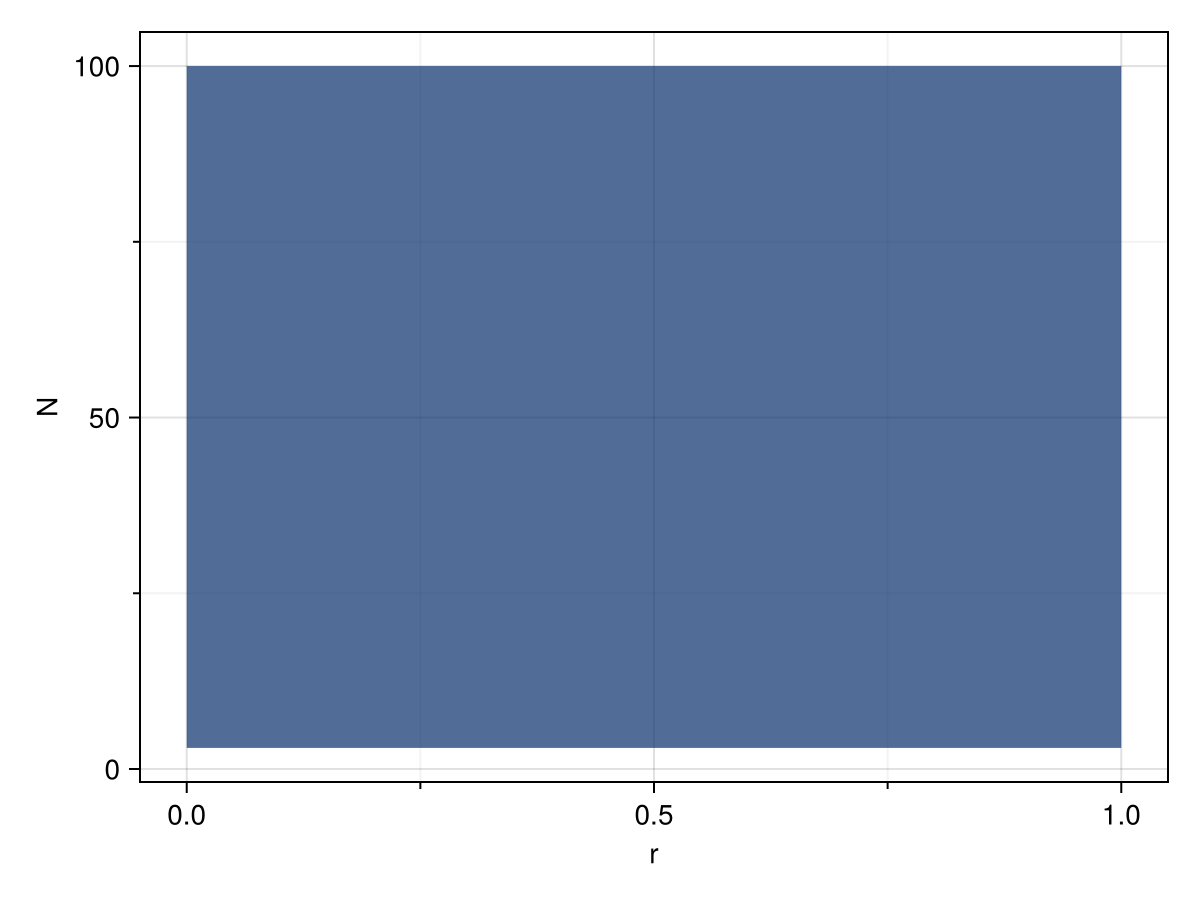

In [33]:
#plot and save the image
img = CairoMakie.plot(result)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_rm0_NND_N1000.png", img)

In [34]:
#plot the logposterior value vs r

#value of r fixed
rfixed = 0.1
rmax=1
rindex = round(Int, 31/rmax* rfixed)
println("rindex: ", rindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[rindex ,: ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[ rindex,: ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "m0",
    ylabel = "Log Posterior",
    title = "m0 vs Log posterior - r = $rfixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.m₀, result.values.log_posterior[rindex , :],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_m0Logpost_NND_N=50_r=$rfixed.png", fig)


rindex: 3


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


LoadError: type NamedTuple has no field m₀

m0index: 16


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


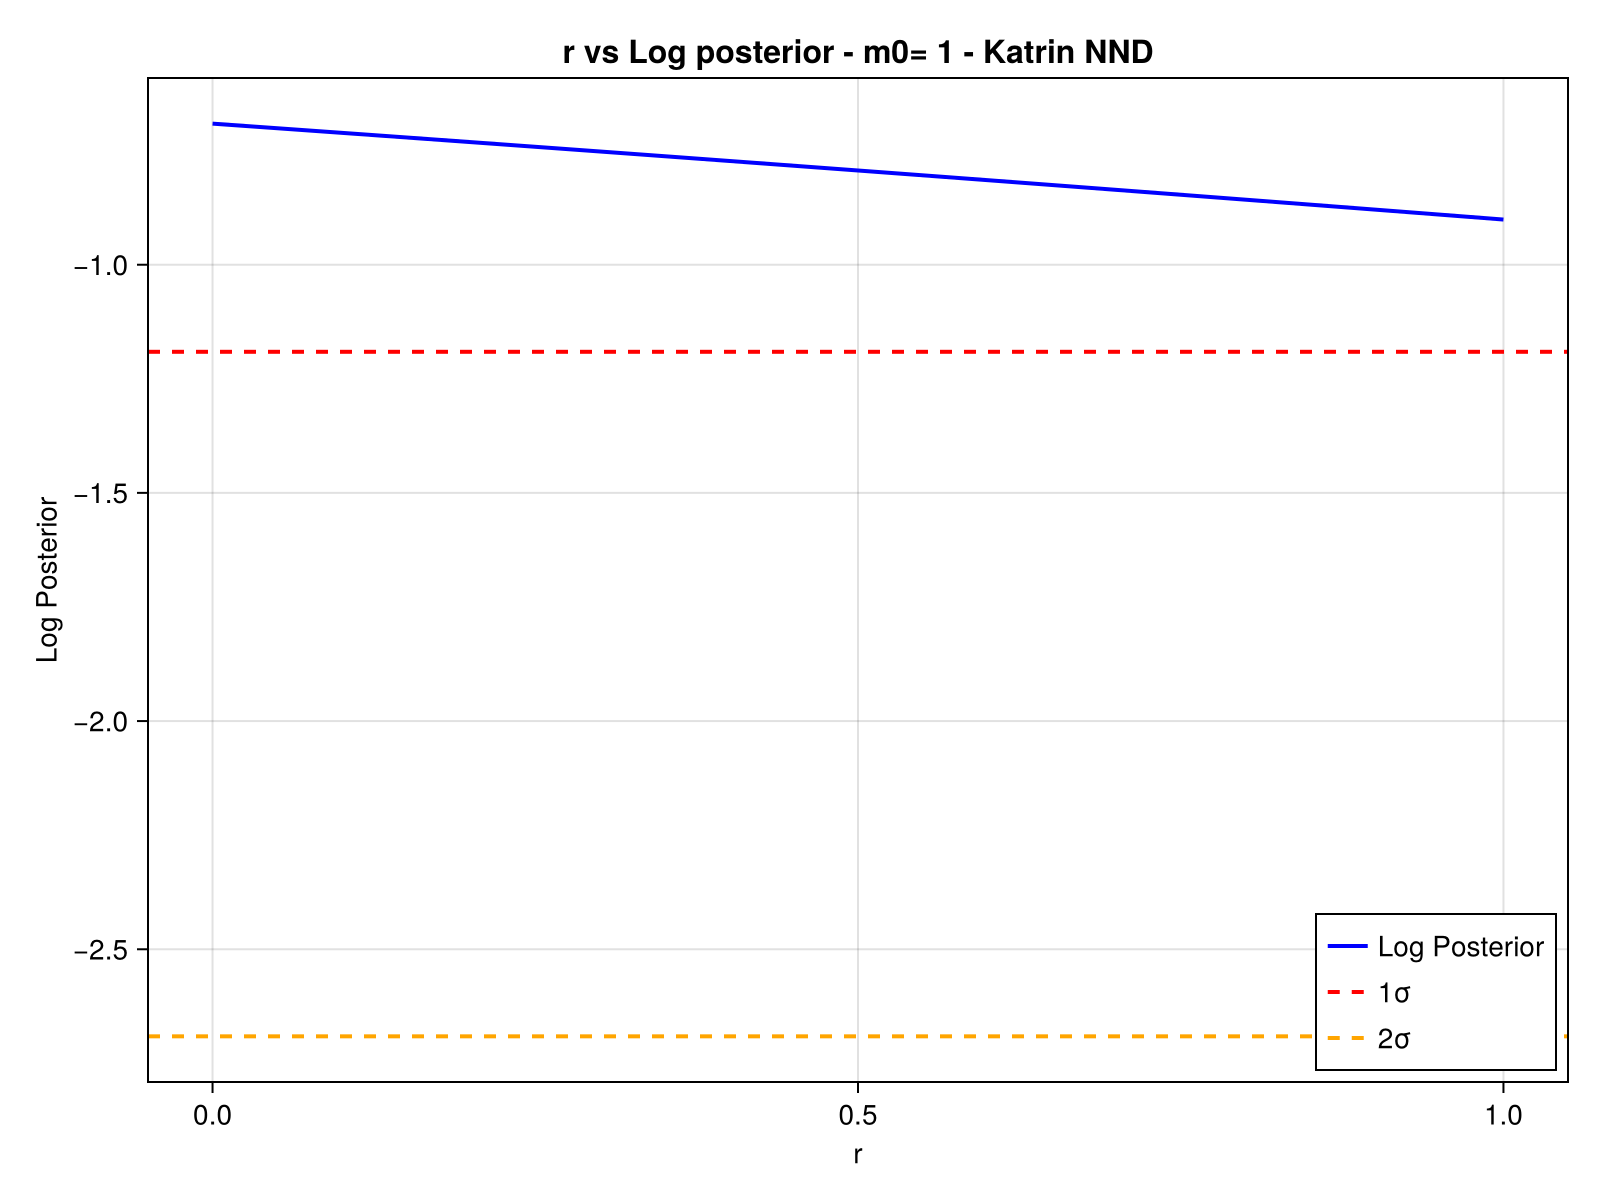

In [ ]:

#value of m0 fixed
m0fixed =1
m0max=2
m0index = round(Int, 31/m0max* m0fixed)
println("m0index: ", m0index)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[:, m0index ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[:, m0index ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "r",
    ylabel = "Log Posterior",
    title = "r vs Log posterior - m0= $m0fixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.r, result.values.log_posterior[:, m0index],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_rLogpost_NND_N=50_m0=$m0fixed.png", fig)
